In [58]:
import pandas as pd 
df=pd.read_csv("C:/Users/User/Downloads/LLM__data.csv")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1171 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1171 non-null   int64 
 1   from_language  1171 non-null   object
 2   model          1171 non-null   object
 3   time           1171 non-null   object
 4   text           1171 non-null   object
 5   response       1171 non-null   object
dtypes: int64(1), object(5)
memory usage: 64.0+ KB


In [60]:
df["model"].nunique()

2

In [61]:
# dropna dan foydalandim sababi 3 ta qator tushib qoladi
df.dropna(inplace=True)

In [ ]:
# encoding  faqat label encodingdan foydalandim sababi target qiymatimni classificationligi sababli 2 ga bo'lib yubordi
from sklearn.preprocessing import LabelEncoder
def encodlash(df):
    encoder=LabelEncoder()
    for col in df.columns:
        if df[col].dtype=="object":
            df[col]=encoder.fit_transform(df[col])
    return df 


In [67]:
df=encodlash(df)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1171 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     1171 non-null   int64
 1   from_language  1171 non-null   int64
 2   model          1171 non-null   int64
 3   time           1171 non-null   int64
 4   text           1171 non-null   int64
 5   response       1171 non-null   int64
dtypes: int64(6)
memory usage: 64.0 KB


In [69]:
df.head(2)

,Unnamed: 0,from_language,model,time,text,response
0,280,0,0,635,926,960
1,891,0,0,38,963,992


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() 

In [72]:
def sclaling(df):
    num_col=df.select_dtypes(include=["int64"]).columns.drop("model")
    df[num_col]=scaler.fit_transform(df[num_col])
    return df

In [73]:
df=sclaling(df)

In [74]:
x=df.drop("model",axis=1)

In [75]:
y=df["model"]

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# Random forest classifair bilan training

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
y_pred=rfc.predict(x_test)

In [87]:
from sklearn.metrics import classification_report
class_rep=classification_report(y_test, y_pred)

In [88]:
print(class_rep)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       124
           1       0.78      0.72      0.75       111

    accuracy                           0.77       235
   macro avg       0.77      0.77      0.77       235
weighted avg       0.77      0.77      0.77       235



# Klib datacleaner

In [ ]:
import klib


In [90]:
df=pd.read_csv("C:/Users/User/Downloads/LLM__data.csv")

In [91]:
df.info() # data qayta chaqirganimiz un yana bir ko'rib olamiz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1174 non-null   int64 
 1   from_language  1174 non-null   object
 2   model          1174 non-null   object
 3   time           1174 non-null   object
 4   text           1172 non-null   object
 5   response       1173 non-null   object
dtypes: int64(1), object(5)
memory usage: 55.2+ KB


GridSpec(6, 6)

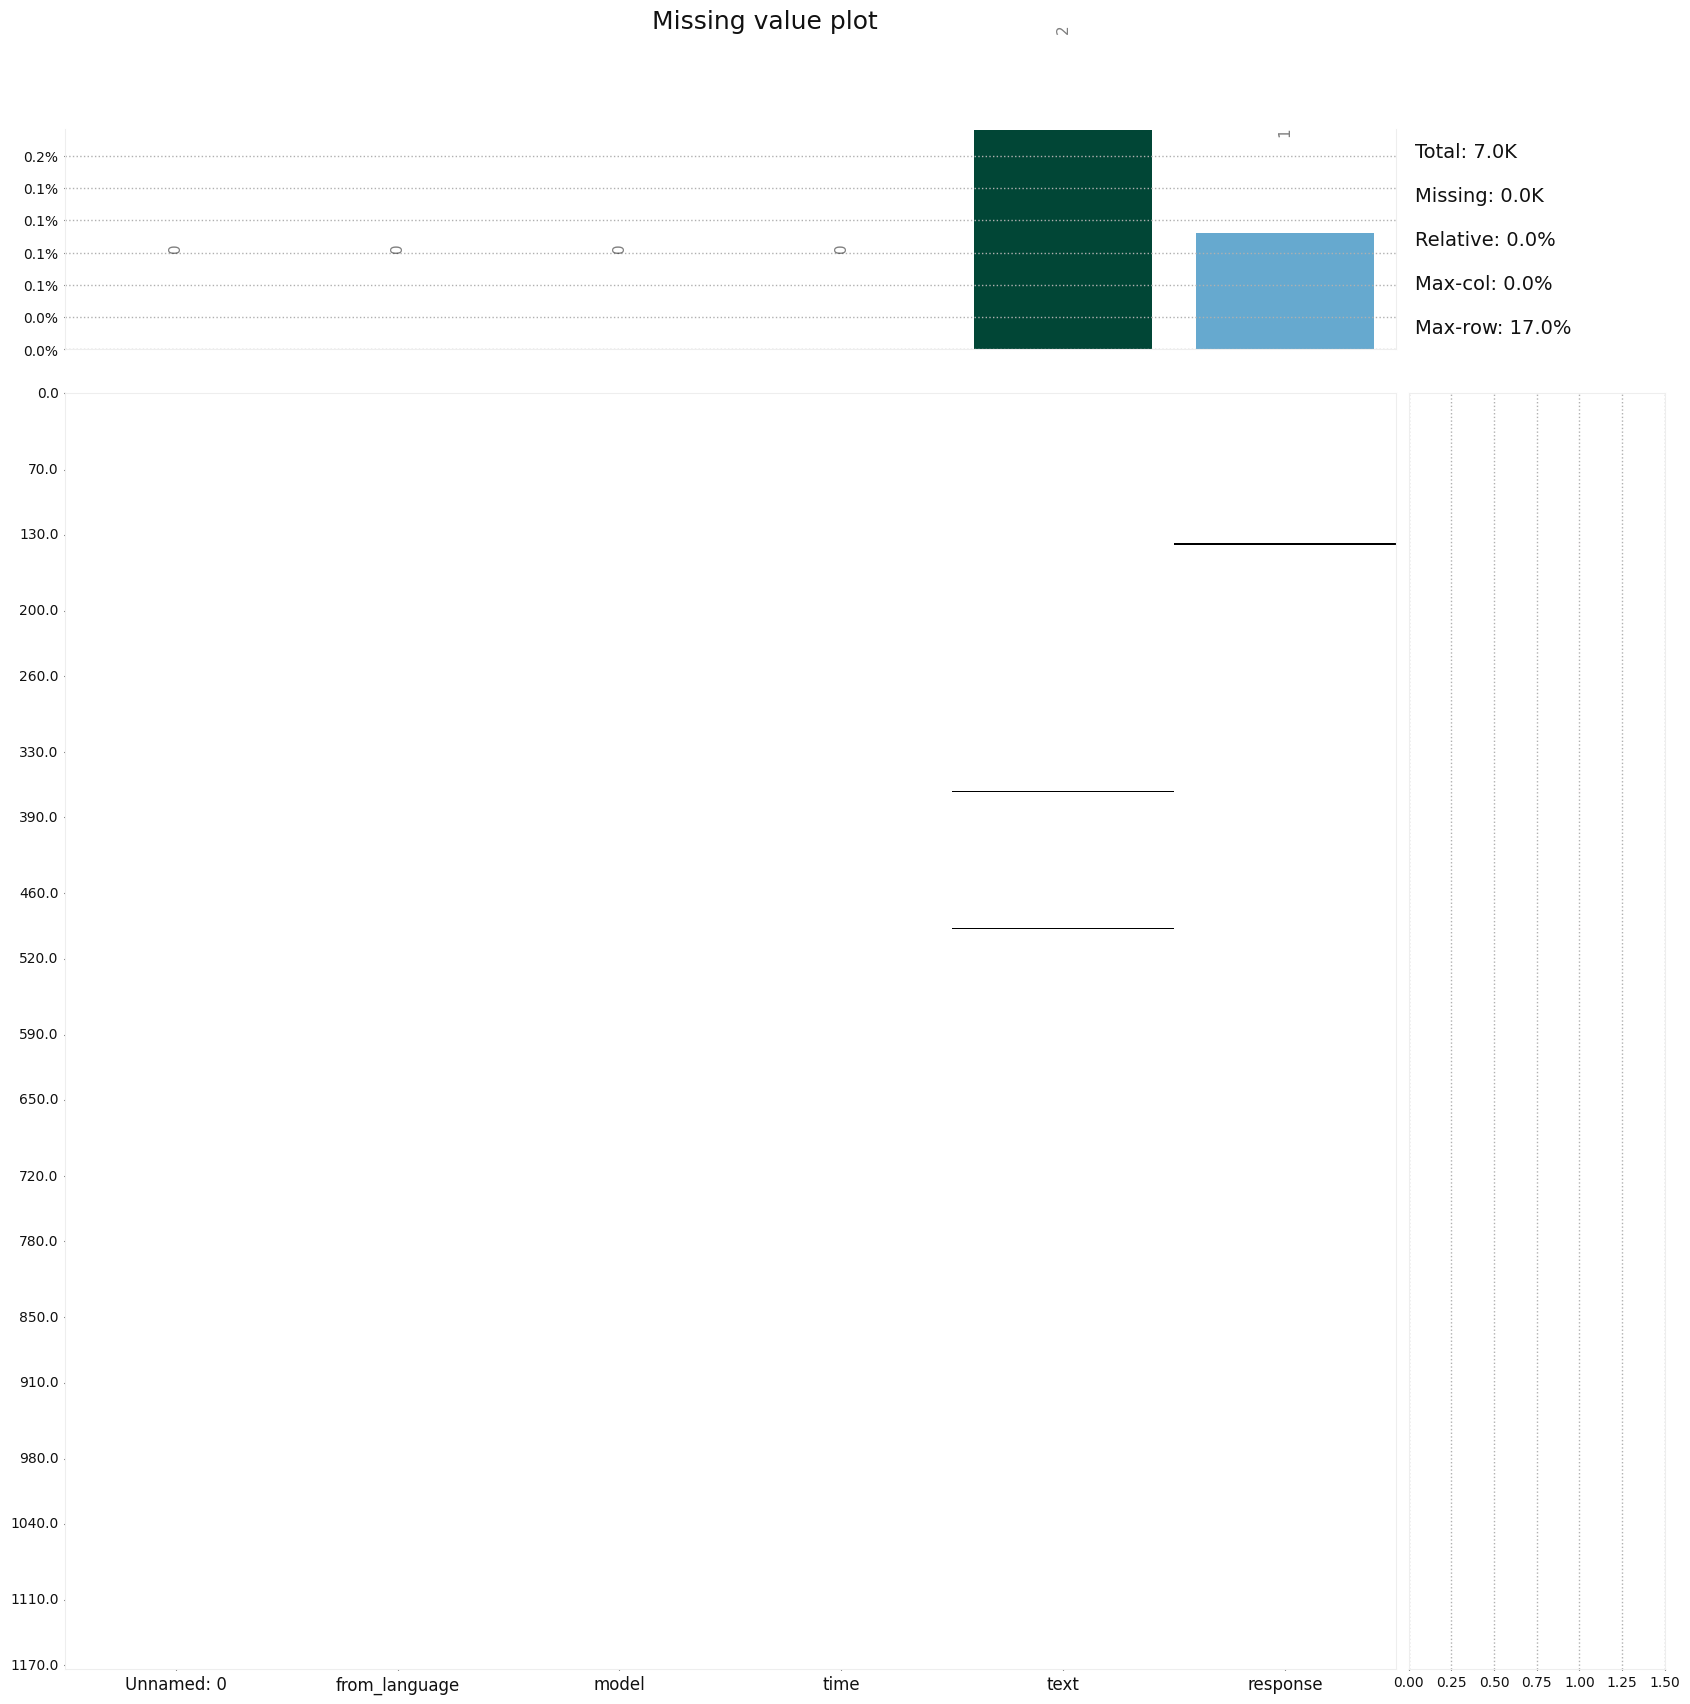

In [92]:
klib.missingval_plot(df)

In [95]:
df=klib.data_cleaning(df,drop_duplicates=True)

Shape of cleaned data: (1174, 6) - Remaining NAs: 3


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.02 MB (-40.0%)



In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   unnamed_0      1174 non-null   int16   
 1   from_language  1174 non-null   category
 2   model          1174 non-null   category
 3   time           1174 non-null   string  
 4   text           1172 non-null   string  
 5   response       1173 non-null   string  
dtypes: category(2), int16(1), string(3)
memory usage: 33.6 KB


### klibda asosan objectdan string va category ga o'tkazdi va tushib qolgan qiymatlar qayerda borligini duplicated bo'lganmi yo'qmi tekshirib berdi

# datacleaner

In [97]:
from datacleaner import autoclean
df=pd.read_csv("C:/Users/User/Downloads/LLM__data.csv")

In [99]:
df=autoclean(df)

c:\Users\User\anaconda3\envs\dars_7\lib\site-packages\datacleaner\datacleaner.py:77: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     1174 non-null   int64
 1   from_language  1174 non-null   int64
 2   model          1174 non-null   int64
 3   time           1174 non-null   int64
 4   text           1174 non-null   int64
 5   response       1174 non-null   int64
dtypes: int64(6)
memory usage: 55.2 KB


In [101]:
df.head(2)

,Unnamed: 0,from_language,model,time,text,response
0,280,0,0,635,927,962
1,891,0,0,38,964,994


### mana auto clean da datasetni avtomatik toldirib encoding qilib berdi

In [104]:
x=df.drop("model",axis=1)

In [105]:
y=df["model"]

In [109]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2, y_test2= train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf_cla=RandomForestClassifier()

In [111]:
rf_cla.fit(x_train2,y_train2)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [112]:
y_predict=rf_cla.predict(x_test2)

In [113]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test2, y_predict)

In [114]:
print(class_report)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       116
           1       0.72      0.77      0.74       119

    accuracy                           0.73       235
   macro avg       0.73      0.73      0.73       235
weighted avg       0.73      0.73      0.73       235



In [5]:
from tabulate import tabulate
data=[
    [ "Random forest classification + funksiya", 0.77, 0.78, 0.72, 0.75],
    ["Random forest classification Klib + DataCleaner", 0.73, 0.72, 0.77, 0.74]
]
sarlovha=["Model turi va usuli", "Accuracy","Precision", "Recall", "F1-sccore"]
print(tabulate(data,headers=sarlovha,tablefmt="fancy_grid"))

╒═════════════════════════════════════════════════╤════════════╤═════════════╤══════════╤═════════════╕
│ Model turi va usuli                             │   Accuracy │   Precision │   Recall │   F1-sccore │
╞═════════════════════════════════════════════════╪════════════╪═════════════╪══════════╪═════════════╡
│ Random forest classification + funksiya         │       0.77 │        0.78 │     0.72 │        0.75 │
├─────────────────────────────────────────────────┼────────────┼─────────────┼──────────┼─────────────┤
│ Random forest classification Klib + DataCleaner │       0.73 │        0.72 │     0.77 │        0.74 │
╘═════════════════════════════════════════════════╧════════════╧═════════════╧══════════╧═════════════╛
